# 프로젝트에 필요한 파이썬 패키지 import // 구글 코랩은 패키지가 미리 다운 돼있어서 import만 하면 됨, nltk는 install해줘야함

In [ ]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 데이터 조합 - 파일 병합하기

In [ ]:
all_files = glob.glob('myCabinetExcelData*.xls')

all_files

[]

빈 리스트 생성 -> 빈 리스트에 병합한 데이터 넣기 -> 잘 넣어졌나 확인

In [ ]:
all_files_data = []

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0]

IndexError: list index out of range

위에 코드에서 만든 all_files_data 리스트를 세로축을 기준으로 병합함 // row가 1000개 있는 것으로 확인 가능

In [ ]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat

위에서 세로축으로 병합한 데이터를 CSV 파일 형태로 저장

In [ ]:
all_files_data_concat.to_csv('RISS_bigdata.csv', encoding='utf-8', index = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 데이터 전처리 하기

제목만을 추출해서 저장

In [ ]:
all_title = all_files_data_concat['제목']

all_title

0      Big data or big brother? Rob Budden describes ...
1      BIG DATA FOR BIG CITIES Moovit has created the...
2      Big Data Management Platforms: Architecting He...
3      Big Data: Mining for meaning How data mining i...
4                               Big data in the big city
                             ...                        
995    Efficient data management tools for the hetero...
996    Securing Big Data Provenance for Auditors: The...
997    Demystifying big data: Anatomy of big data dev...
998    Assessing Whether “Big Data” Solutions Provide...
999    Why Big Data Is a Big Deal A new class of data...
Name: 제목, Length: 1000, dtype: object

In [ ]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [ ]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)



1. (stopwords.words("english") // 영어 불용어, 전처리 작업을 위해
2. re.sub() // 제거하기
3. [^a-zA-Z]+ // 알파벳으로 시작하지 않는
4. EnWords.lower() // 소문자로 정규화
5. word_tokenize() // 단어 토큰화
6. w for w in EnWordsToken if w not in stopWords // EnWordsToken에서 불용어를 제거
7. EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] // 표제어 추출







In [ ]:
print(words)

[['big', 'data', 'big', 'brother', 'rob', 'budden', 'describes', 'bank', 'making', 'use', 'information', 'build', 'detailed', 'profile', 'customer', 'combat', 'fraud'], ['big', 'data', 'big', 'city', 'moovit', 'created', 'waze', 'public', 'transit', 'app', 'beat', 'urban', 'congestion'], ['big', 'data', 'management', 'platform', 'architecting', 'heterogeneous', 'solution'], ['big', 'data', 'mining', 'meaning', 'data', 'mining', 'bringing', 'order', 'chaos'], ['big', 'data', 'big', 'city'], ['big', 'data', 'natural', 'disaster', 'new', 'approach', 'spatial', 'temporal', 'massive', 'data', 'analysis'], ['big', 'data', 'health', 'research', 'governance', 'challenge', 'mixed', 'data', 'economy'], ['big', 'benefit', 'big', 'data', 'real', 'time', 'data', 'product', 'creation', 'distribution', 'system'], ['big', 'data', 'yet', 'big', 'enough', 'determine', 'influence', 'intracranial', 'pressure', 'monitoring', 'outcome', 'child', 'severe', 'traumatic', 'brain', 'injury'], ['big', 'data', 'fa

1차원 리스트로 변경

In [ ]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)

['big', 'data', 'big', 'brother', 'rob', 'budden', 'describes', 'bank', 'making', 'use', 'information', 'build', 'detailed', 'profile', 'customer', 'combat', 'fraud', 'big', 'data', 'big', 'city', 'moovit', 'created', 'waze', 'public', 'transit', 'app', 'beat', 'urban', 'congestion', 'big', 'data', 'management', 'platform', 'architecting', 'heterogeneous', 'solution', 'big', 'data', 'mining', 'meaning', 'data', 'mining', 'bringing', 'order', 'chaos', 'big', 'data', 'big', 'city', 'big', 'data', 'natural', 'disaster', 'new', 'approach', 'spatial', 'temporal', 'massive', 'data', 'analysis', 'big', 'data', 'health', 'research', 'governance', 'challenge', 'mixed', 'data', 'economy', 'big', 'benefit', 'big', 'data', 'real', 'time', 'data', 'product', 'creation', 'distribution', 'system', 'big', 'data', 'yet', 'big', 'enough', 'determine', 'influence', 'intracranial', 'pressure', 'monitoring', 'outcome', 'child', 'severe', 'traumatic', 'brain', 'injury', 'big', 'data', 'false', 'discovery', 

# 데이터 탐색 및 분석 모델 구축

In [ ]:
count = Counter(words2)

count

Counter({'big': 1354,
         'data': 1645,
         'brother': 7,
         'rob': 2,
         'budden': 1,
         'describes': 1,
         'bank': 4,
         'making': 19,
         'use': 22,
         'information': 26,
         'build': 2,
         'detailed': 2,
         'profile': 3,
         'customer': 5,
         'combat': 3,
         'fraud': 6,
         'city': 17,
         'moovit': 1,
         'created': 1,
         'waze': 1,
         'public': 11,
         'transit': 1,
         'app': 1,
         'beat': 2,
         'urban': 13,
         'congestion': 1,
         'management': 48,
         'platform': 19,
         'architecting': 2,
         'heterogeneous': 7,
         'solution': 13,
         'mining': 40,
         'meaning': 1,
         'bringing': 1,
         'order': 2,
         'chaos': 2,
         'natural': 1,
         'disaster': 4,
         'new': 38,
         'approach': 44,
         'spatial': 10,
         'temporal': 6,
         'massive': 4,
         'an

In [ ]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
smart : 34
cloud : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
information : 26
framework : 26
computing : 25
application : 25
social : 24
driven : 24
issue : 24
deal : 23
network : 23
quality : 23
use : 22
knowledge : 22
era : 22
efficient : 22
review : 22
healthcare : 21
perspective : 21
storage : 21
service : 21
open : 20
making : 19
platform : 19
survey : 19
process : 19
large : 18
method : 18
environment : 18


데이터 수집때 검색 키워트가 big data였기 때문에 big과 data가 모든 제목에 포함 되어있다 그렇기 때문에 big과 data를 제외하여 다른 자료의 양을 확실히 볼 수 있게 바꾼다

In [ ]:
del word_count['big']
del word_count['data']

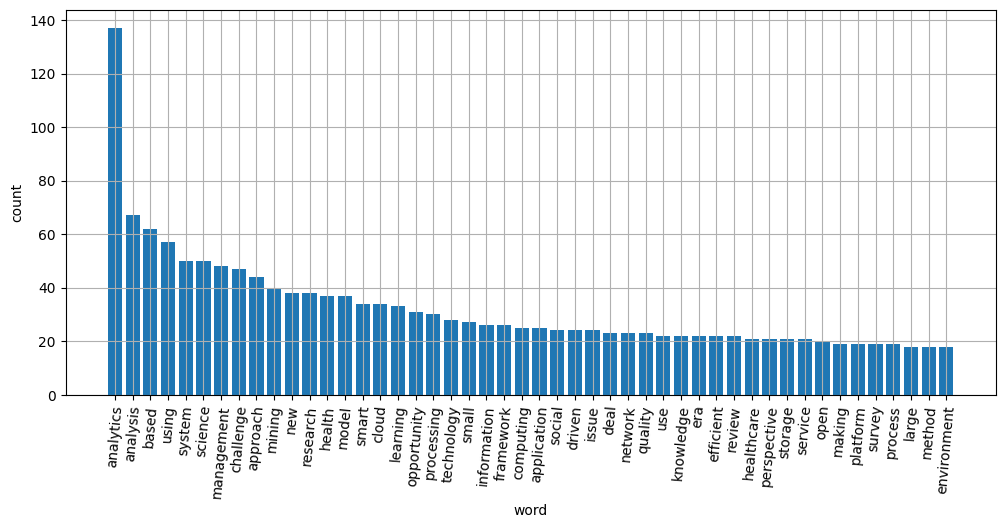

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85) # rotation에는 숫자값을 전달해야함 ''제거

plt.show()

# 결과 시각화 하기

연도별로 문서 분류

In [ ]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


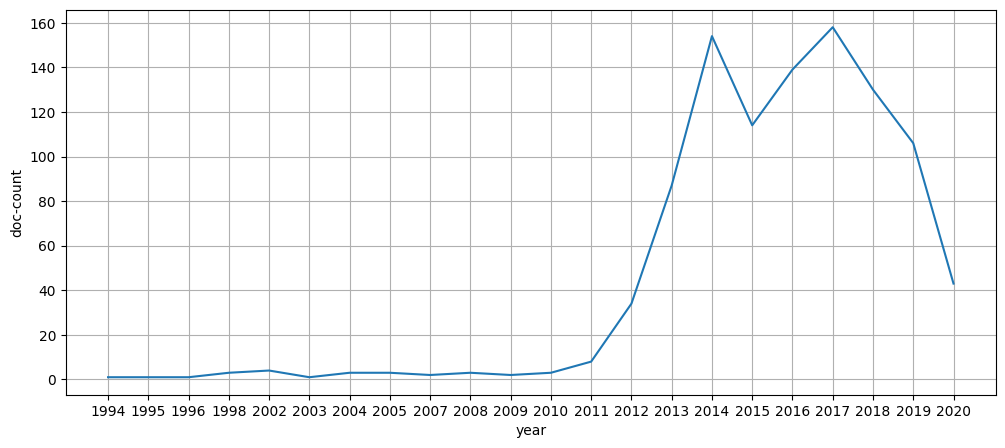

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

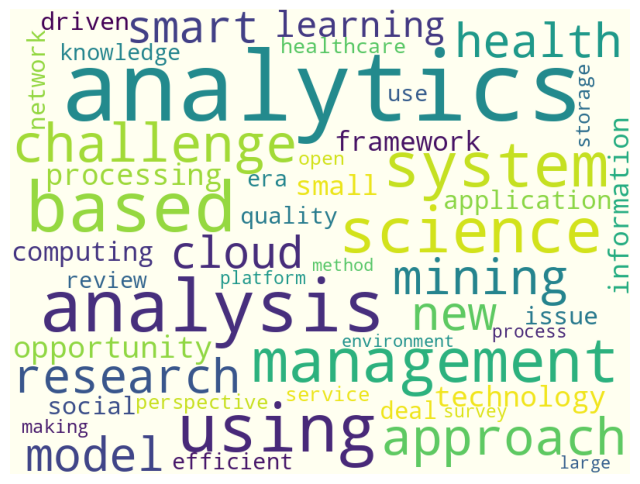

In [ ]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file("빅데이터_시각화.jpg")